## Task 1 - Diabetes Dataset



a. Load the datasets into NumPy or Pandas objects.

In [1]:
# Importing dataset, neccessary libraries and creating DataFrame
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(f"Features: {list(diabetes.feature_names)}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


b. Determine whether the data needs to be cleaned, and if so, clean it. Check for missing
features. Check for erroneous values and missing values. If there are missing values, you can
adopt the simplest approach and delete them. Alternatively you can explore other approaches
such as imputation (e.g., using the average of the observed values).

Here, we will perform data preprocessing and clean our dataset by checking for:
1. data types
2. missing values
3. duplicates - remove if any
4. outliers

In [3]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [4]:
# Check data types and convert if necessary
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [5]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any 
df = df.drop_duplicates()

Duplicate rows: 0


c. Conduct a statistical analysis of the data. Explore the means of the features and the max
and min values. Consider whether this might imply that performing some scaling could be
beneficial. Use box plots, histograms, and scatter plots to explore the distributions of the
data. For example, is one of the features concentrated around one mode? Two modes? Does
the empirical distribution exhibit heavy tails or is it closer to Gaussian? Are some features
discrete/categorical? Are some of the features correlated?

In [6]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e

In [7]:
from scipy import stats

print("\n" + "="*60)
print("Detailed Statistics:")
print("="*60)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
  
    # 1. Skewness and Kurtosis
    sk = stats.skew(df[col])
    kt = stats.kurtosis(df[col])
    print(f"  Skewness: {sk:.4f} ({'Right-tailed' if sk > 0 else 'Left-tailed' if sk < 0 else 'Symmetric'})")
    print(f"  Kurtosis: {kt:.4f} ({'Leptokurtic' if kt > 0 else 'Platykurtic' if kt < 0 else 'Mesokurtic'})")
    
    # 2. Normality Testing (Shapiro-Wilk)
    # H0: The data follows a Gaussian distribution
    shapiro_stat, p_value = stats.shapiro(df[col])
    print(f"  Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={p_value:.4f}")
    
    if p_value > 0.05:
        print("  Result: Data appears Gaussian (Fail to reject H0)")
    else:
        print("  Result: Data does NOT appear Gaussian (Reject H0)")
# ...existing code...


Detailed Statistics:

age:
  Mean: -0.0000
  Median: 0.0054
  Std Dev: 0.0476
  Min: -0.1072
  Max: 0.1107
  Skewness: -0.2306 (Left-tailed)
  Kurtosis: -0.6772 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.9824, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

sex:
  Mean: 0.0000
  Median: -0.0446
  Std Dev: 0.0476
  Min: -0.0446
  Max: 0.0507
  Skewness: 0.1270 (Right-tailed)
  Kurtosis: -1.9839 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.6351, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

bmi:
  Mean: -0.0000
  Median: -0.0073
  Std Dev: 0.0476
  Min: -0.0903
  Max: 0.1706
  Skewness: 0.5961 (Right-tailed)
  Kurtosis: 0.0805 (Leptokurtic)
  Shapiro-Wilk Test: Stat=0.9728, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

bp:
  Mean: -0.0000
  Median: -0.0057
  Std Dev: 0.0476
  Min: -0.1124
  Max: 0.1320
  Skewness: 0.2897 (Right-tailed)
  Kurtosis: -0.5403 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.9837, p-value=0.0001
  Result: 

Correlation Matrix:
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4   

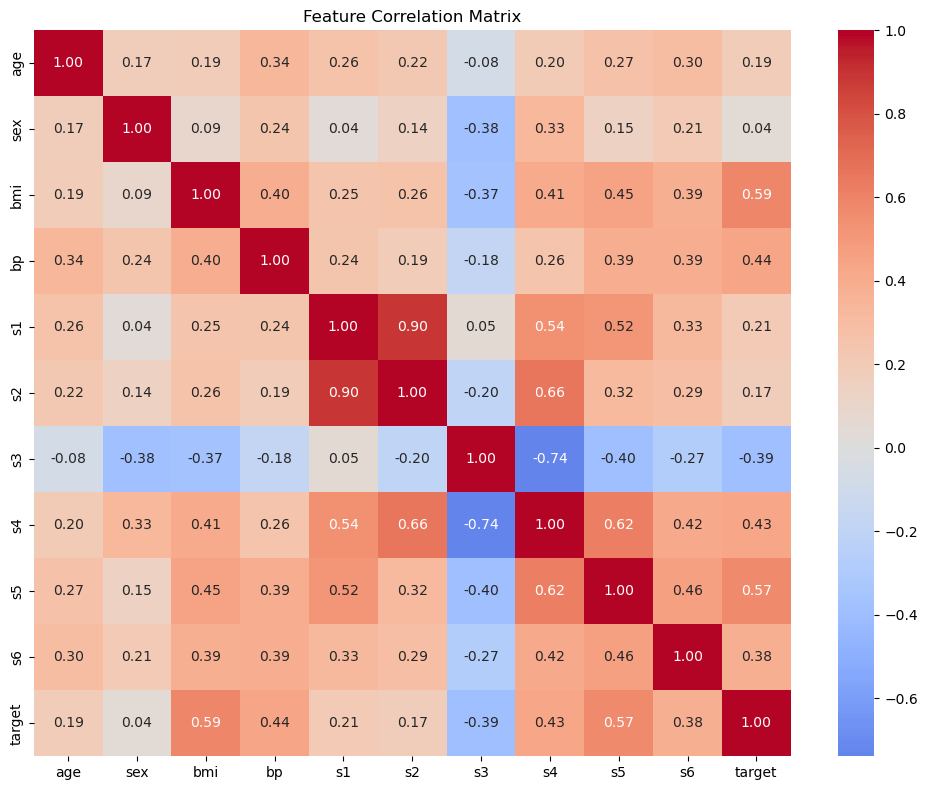


Highly correlated feature pairs (|correlation| > 0.7):
s1 <-> s2: 0.8967
s3 <-> s4: -0.7385


In [8]:
# Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\nHighly correlated feature pairs (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.4f}")

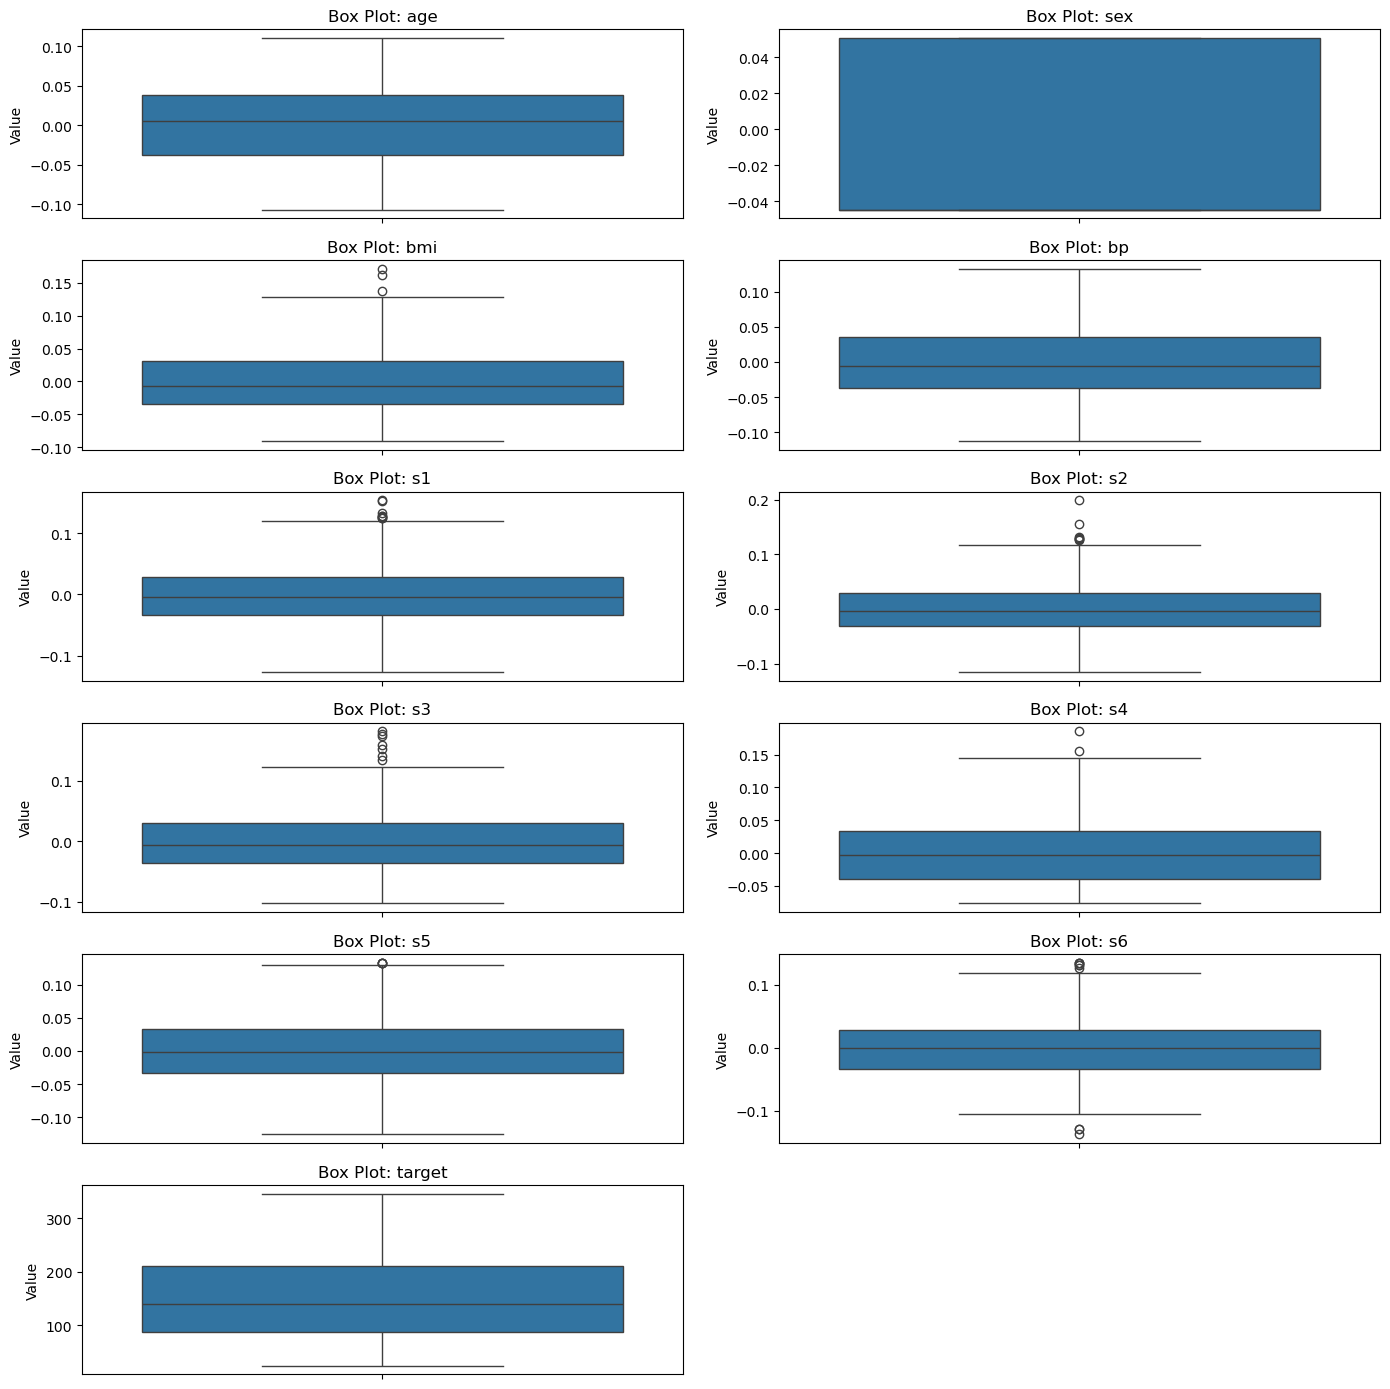


Box plots show potential outliers (dots outside whiskers) and distribution skewness.


In [9]:
# Box plots for each feature (to detect outliers and distribution)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel('Value')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nBox plots show potential outliers (dots outside whiskers) and distribution skewness.")


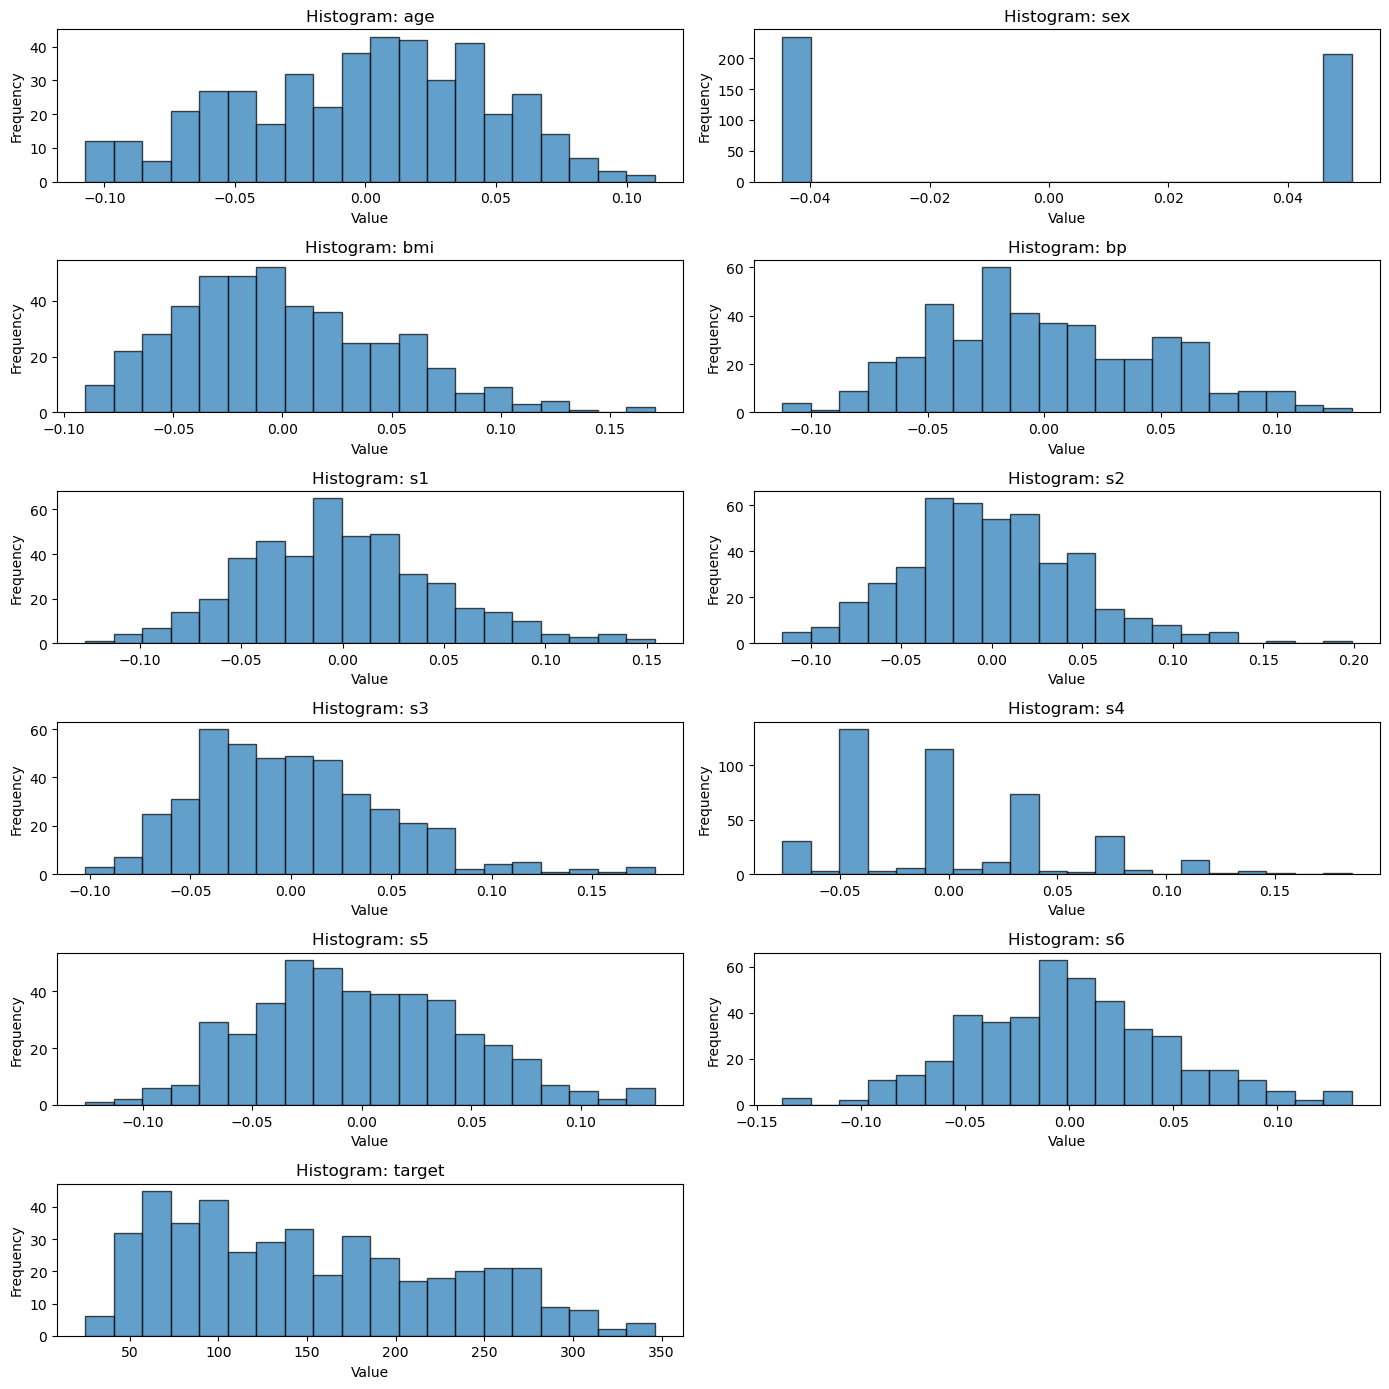


Histograms show the distribution shape (Gaussian, skewed, multimodal, etc.)


In [10]:
# Histograms for each feature (to explore distributions)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nHistograms show the distribution shape (Gaussian, skewed, multimodal, etc.)")


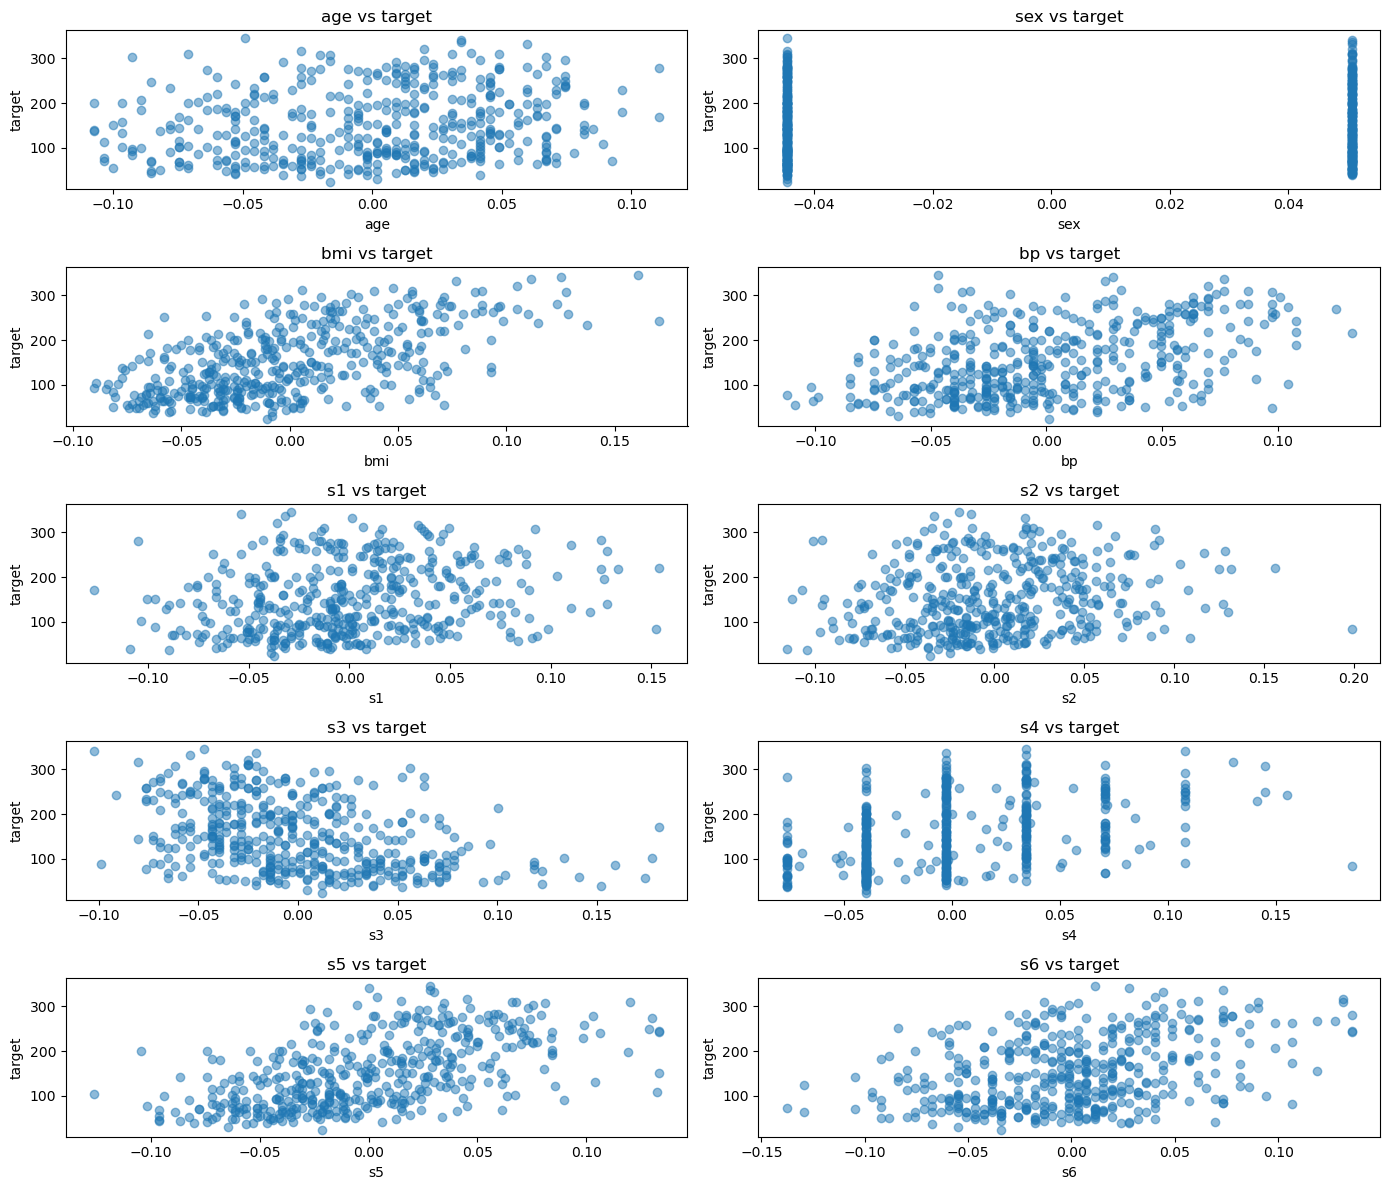


Scatter plots show relationships between features and target variable.


In [11]:
# Scatter plots (features vs target)
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['target'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('target')
    axes[idx].set_title(f'{col} vs target')

plt.tight_layout()
plt.show()

print("\nScatter plots show relationships between features and target variable.")

In [12]:
# Scaling analysis - check range of features
print("Feature Ranges:")
print("="*60)
for col in df.columns[:-1]:  # Exclude target
    print(f"{col}: [{df[col].min():.4f}, {df[col].max():.4f}]")


Feature Ranges:
age: [-0.1072, 0.1107]
sex: [-0.0446, 0.0507]
bmi: [-0.0903, 0.1706]
bp: [-0.1124, 0.1320]
s1: [-0.1268, 0.1539]
s2: [-0.1156, 0.1988]
s3: [-0.1023, 0.1812]
s4: [-0.0764, 0.1852]
s5: [-0.1261, 0.1336]
s6: [-0.1378, 0.1356]


## Data Preparation and Train-Test Split

Following sklearn best practices:
1. Split data FIRST (before scaling) to prevent data leakage
2. Standardize features using ONLY training set statistics
3. Apply same transformation to test set

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Separate features and target using column names
print("="*70)
print("DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION")
print("="*70)

# Check if 'target' column exists
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")

# Get feature columns (all except 'target')
feature_columns = [col for col in df.columns if col != 'target']
print(f"\nFeature columns: {feature_columns}")
print(f"Target column: 'target'")

# Extract features and target using column names (NOT iloc)
X_raw = df[feature_columns].values
y = df['target'].values

print(f"\nOriginal data shape:")
print(f"  X_raw: {X_raw.shape}")
print(f"  y: {y.shape}")

# Step 2: Train-test split (70% train, 30% test) BEFORE standardization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.3, random_state=42
)

print(f"\nAfter train-test split (BEFORE standardization):")
print(f"  X_train_raw: {X_train_raw.shape}")
print(f"  X_test_raw: {X_test_raw.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

# Step 3: Manual Standardization (NO sklearn.preprocessing.StandardScaler)
# Compute mean and std from TRAINING SET ONLY
train_mean = np.mean(X_train_raw, axis=0)
train_std = np.std(X_train_raw, axis=0)

print(f"  Train mean shape: {train_mean.shape}")
print(f"  Train std shape: {train_std.shape}")

# Apply standardization: X_scaled = (X - miu_train) / sigma_train
X_train = (X_train_raw - train_mean) / train_std
X_test = (X_test_raw - train_mean) / train_std

print(f"\nAfter manual standardization:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# Verification: Check that training set is standardized
print(f"\n Verification (X_train should have mean≈0, std≈1):")
print(f"  X_train mean: {np.mean(X_train, axis=0)}")
print(f"  X_train std: {np.std(X_train, axis=0)}")

print("\n" + "="*70)
print("DATA PREPARATION COMPLETE")
print("="*70)

DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION

Feature columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target column: 'target'

Original data shape:
  X_raw: (442, 10)
  y: (442,)

After train-test split (BEFORE standardization):
  X_train_raw: (309, 10)
  X_test_raw: (133, 10)
  y_train: (309,)
  y_test: (133,)
  Train mean shape: (10,)
  Train std shape: (10,)

After manual standardization:
  X_train: (309, 10)
  X_test: (133, 10)

 Verification (X_train should have mean≈0, std≈1):
  X_train mean: [-3.88039115e-17  2.96778064e-16 -6.10802311e-17  1.67072397e-17
 -3.05401156e-17  4.63491166e-17 -9.19796422e-17  5.53674330e-16
  7.67095844e-17 -8.34014627e-17]
  X_train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

DATA PREPARATION COMPLETE


In [14]:
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Handle potential division by zero
    std[std == 0] = 1.0
    
    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std
    
    return X_train_std, X_test_std

In [15]:
class ElasticNetRegression:
    def __init__(self, learning_rate=0.001, iterations=50000, alpha=1.0, rho=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Overall regularization strength
        self.rho = rho      # L1 ratio (rho=1 is Lasso, rho=0 is Ridge)
        self.weights = None
        self.bias = None

    def soft_threshold(self, w, penalty):
        """Implementation of Equation 10 & 11 from the handout[cite: 38, 57]."""
        return np.sign(w) * np.maximum(np.abs(w) - penalty, 0.0)

    def update_weights(self):
        """
        Calculates gradients and updates parameters using the optimization 
        problem from Section 1.3 of the handout[cite: 42].
        """
        y_pred = self.X @ self.weights + self.bias
        errors = y_pred - self.y
        
        # lambda1 (sparsity) and lambda2 (shrinkage) 
        l1_penalty = self.alpha * self.rho
        l2_penalty = self.alpha * (1 - self.rho)
        
        # Step 1: Gradient of MSE + L2 part (Ridge part) 
        # factor 2 as defined in the handout's loss gradients 
        dw = (2 / self.n_samples) * (self.X.T @ errors) + (2 * l2_penalty * self.weights)
        db = (2 / self.n_samples) * np.sum(errors)
        
        # Standard gradient descent step [cite: 53]
        self.bias -= self.learning_rate * db
        self.weights -= self.learning_rate * dw
        
        # Step 2: Proximal step for L1 (Lasso part) [cite: 60]
        # alpha = etha * lambda1 [cite: 57]
        shrinkage = self.learning_rate * l1_penalty
        self.weights = self.soft_threshold(self.weights, shrinkage)

    def fit(self, X, y):
        """Training loop that satisfies Task 2 requirements."""
        self.n_samples, self.n_features = X.shape
        self.X = X
        self.y = y
        self.weights = np.zeros(self.n_features)
        self.bias = np.mean(y)
        
        for i in range(self.iterations):
            self.update_weights()

    def predict(self, X):
        """Prediction rule: y = Xw + b."""
        return X @ self.weights + self.bias

In [16]:
class LassoRegression:
    def __init__(self, learning_rate=0.001, iterations=50000, alpha=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Regularization strength (lambda) [cite: 7, 17]
        self.weights = None
        self.bias = None

    def soft_threshold(self, w, penalty):
        """
        Implementation of Equations 10 & 11 from the assignment PDF[cite: 60, 74, 76].
        Encourages sparsity by setting small weights to exactly zero[cite: 15].
        """
        return np.sign(w) * np.maximum(np.abs(w) - penalty, 0.0)

    def update_weights(self):
        """
        Weight update rule using gradient descent and proximal gradient (soft-thresholding) 
        as required by Task 2[cite: 5, 47, 51].
        """
        # Step 1: Gradient update on MSE part (ignoring L1 penalty initially) [cite: 51, 52]
        y_pred = self.X @ self.weights + self.bias
        errors = y_pred - self.y
        
        # Gradients for weights and bias [cite: 9, 18]
        dw = (1 / self.n_samples) * (self.X.T @ errors)
        db = (1 / self.n_samples) * np.sum(errors)
        
        # Standard gradient descent step [cite: 53]
        self.bias -= self.learning_rate * db
        self.weights -= self.learning_rate * dw
        
        # Step 2: Apply soft-thresholding (L1 proximal step) 
        # Shrinkage alpha = learning_rate * lambda (penalty) 
        shrinkage = self.learning_rate * self.alpha
        self.weights = self.soft_threshold(self.weights, shrinkage)

    def fit(self, X, y):
        """
        Training loop that calls update_weights for each iteration.
        """
        self.n_samples, self.n_features = X.shape
        self.X = X
        self.y = y
        self.weights = np.zeros(self.n_features)
        self.bias = np.mean(y) # Initial bias as the mean of targets
        
        for i in range(self.iterations):
            self.update_weights()

    def predict(self, X):
        """Prediction rule: y = Xw + b[cite: 5, 48]."""
        return X @ self.weights + self.bias

## Hyperparameter Tuning


In [17]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def create_kfold_splits(n_samples, n_folds=5, shuffle=True, random_state=42):
    indices = np.arange(n_samples)
    if shuffle:
        np.random.seed(random_state)
        np.random.shuffle(indices)
    fold_sizes = np.full(n_folds, n_samples // n_folds, dtype=int)
    fold_sizes[:n_samples % n_folds] += 1
    current = 0
    splits = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]]) 
        splits.append((train_idx, val_idx))
        current = stop
    return splits

In [18]:
# --- ELASTICNET TUNING ---
print("="*70)
print("ELASTICNET HYPERPARAMETER TUNING")
print("="*70)

# Recommended ranges: Low Alpha for accuracy, Rho favoring Lasso/Mixed
alpha_values = np.array([0.001, 0.005, 0.01, 0.05, 0.1])
rho_values = np.array([0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95]) 
en_cv_results = []

for alpha in alpha_values:
    for rho in rho_values:
        # Assuming create_kfold_splits and X_train/y_train are defined in your environment
        kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
        fold_mse = []
        fold_nonzero = []
        
        for train_idx, val_idx in kfold_splits:
            model = ElasticNetRegression(learning_rate=0.005, iterations=30000, alpha=alpha, rho=rho)
            
            # --- SOFT THRESHOLDING ---
            # The L1 penalty (alpha * rho) applies the soft-thresholding operator 
            # during fit, pushing coefficients of low-signal features toward zero.
            model.fit(X_train[train_idx], y_train[train_idx])
            
            y_pred = model.predict(X_train[val_idx])
            fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
            
            # Count features that the internal math set to exactly 0.0
            fold_nonzero.append(np.sum(model.weights != 0))
        
        avg_mse = np.mean(fold_mse)
        se_mse = np.std(fold_mse) / np.sqrt(len(fold_mse))
        
        en_cv_results.append({
            'alpha': alpha, 
            'rho': rho,
            'cv_mse_mean': avg_mse,
            'cv_mse_se': se_mse,
            'nonzero_features': np.mean(fold_nonzero)
        })
        print(f"Alpha {alpha:>5.3f}, Rho {rho:>4.2f} | MSE: {avg_mse:.2f} ± {se_mse:.2f} | Active: {np.mean(fold_nonzero):.1f}/10")

# --- SELECTION STRATEGY: MINIMUM CV ERROR ---
# Selecting the absolute best performing parameters
best_en_params = min(en_cv_results, key=lambda x: x['cv_mse_mean'])

en_alpha_final = best_en_params['alpha']
en_rho_final = best_en_params['rho']

print("\n" + "="*70)
print("SELECTION STRATEGY: MINIMUM CV ERROR")
print("="*70)
print(f"Minimum CV MSE: {best_en_params['cv_mse_mean']:.2f}")
print(f"Selected Alpha: {en_alpha_final}, Rho: {en_rho_final}")
print(f"Expected Active Features: {best_en_params['nonzero_features']:.1f}")

# --- FINAL ELASTICNET TRAINING ---
print("\n" + "="*70)
print("FINAL ELASTICNET TRAINING")
print("="*70)
final_en = ElasticNetRegression(learning_rate=0.001, iterations=50000, 
                                 alpha=en_alpha_final, rho=en_rho_final)
final_en.fit(X_train, y_train)

# Metrics calculation
y_train_pred = final_en.predict(X_train)
final_en_r2 = calculate_r2(y_train, y_train_pred)
active_en = np.sum(final_en.weights != 0)

# --- RESULTS DISPLAY ---
print(f"\n" + "="*40)
print(f"FINAL ELASTICNET RESULTS (Alpha: {en_alpha_final}, Rho: {en_rho_final})")
print(f"R-squared: {final_en_r2:.4f}")
print(f"Features Kept: {active_en}/10")
print(f"Features Eliminated: {10 - active_en}/10")
print("="*40)

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for name, w in zip(feature_names, final_en.weights):
    status = "ACTIVE" if w != 0.0 else "ELIMINATED"
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated = [name for name, w in zip(feature_names, final_en.weights) if w == 0.0]
if eliminated:
    print(f"\nEliminated features: {', '.join(eliminated)}")
else:
    print("\nNo features were eliminated.")

ELASTICNET HYPERPARAMETER TUNING
Alpha 0.001, Rho 0.10 | MSE: 3221.57 ± 155.22 | Active: 10.0/10
Alpha 0.001, Rho 0.30 | MSE: 3222.40 ± 155.89 | Active: 10.0/10
Alpha 0.001, Rho 0.50 | MSE: 3223.27 ± 156.60 | Active: 10.0/10
Alpha 0.001, Rho 0.70 | MSE: 3224.18 ± 157.33 | Active: 10.0/10
Alpha 0.001, Rho 0.80 | MSE: 3224.66 ± 157.71 | Active: 10.0/10
Alpha 0.001, Rho 0.90 | MSE: 3225.14 ± 158.10 | Active: 10.0/10
Alpha 0.001, Rho 0.95 | MSE: 3225.39 ± 158.30 | Active: 10.0/10
Alpha 0.005, Rho 0.10 | MSE: 3211.35 ± 146.61 | Active: 10.0/10
Alpha 0.005, Rho 0.30 | MSE: 3213.43 ± 148.42 | Active: 10.0/10
Alpha 0.005, Rho 0.50 | MSE: 3215.97 ± 150.58 | Active: 10.0/10
Alpha 0.005, Rho 0.70 | MSE: 3219.12 ± 153.20 | Active: 10.0/10
Alpha 0.005, Rho 0.80 | MSE: 3220.97 ± 154.72 | Active: 10.0/10
Alpha 0.005, Rho 0.90 | MSE: 3223.06 ± 156.41 | Active: 10.0/10
Alpha 0.005, Rho 0.95 | MSE: 3224.19 ± 157.32 | Active: 10.0/10
Alpha 0.010, Rho 0.10 | MSE: 3205.35 ± 141.06 | Active: 10.0/10
Alpha 0

In [24]:
# --- LASSO TUNING ---
print("="*70)
print("LASSO HYPERPARAMETER TUNING")
print("="*70)

lasso_alpha_values = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 1.5, 2.0])
lasso_cv_results = []

for alpha in lasso_alpha_values:
    kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
    fold_mse = []
    fold_r2 = [] 
    fold_nonzero = []
    
    for train_idx, val_idx in kfold_splits:
        model = LassoRegression(learning_rate=0.001, iterations=50000, alpha=alpha)
        model.fit(X_train[train_idx], y_train[train_idx])
        
        y_pred = model.predict(X_train[val_idx])
        fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
        fold_r2.append(calculate_r2(y_train[val_idx], y_pred))
        fold_nonzero.append(np.sum(model.weights != 0))
    
    avg_mse, avg_r2 = np.mean(fold_mse), np.mean(fold_r2)
    se_mse = np.std(fold_mse) / np.sqrt(len(fold_mse))
    
    lasso_cv_results.append({
        'alpha': alpha, 'cv_mse_mean': avg_mse, 'cv_r2_mean': avg_r2,
        'cv_mse_se': se_mse, 'nonzero_features': np.mean(fold_nonzero)
    })
    print(f"Alpha {alpha:>5.3f} | MSE: {avg_mse:.2f} ± {se_mse:.2f} | R2: {avg_r2:.4f} | Active: {np.mean(fold_nonzero):.1f}/10")

# --- SELECTION STRATEGY: 1-SE RULE ---
best_mse_res = min(lasso_cv_results, key=lambda x: x['cv_mse_mean'])
one_se_limit = best_mse_res['cv_mse_mean'] + best_mse_res['cv_mse_se']
lasso_alpha_final = max([res for res in lasso_cv_results if res['cv_mse_mean'] <= one_se_limit], key=lambda x: x['alpha'])['alpha']

# --- FINAL LASSO TRAINING & ANALYSIS ---
lasso_final = LassoRegression(learning_rate=0.001, iterations=50000, alpha=lasso_alpha_final)
lasso_final.fit(X_train, y_train)

y_train_p, y_test_p = lasso_final.predict(X_train), lasso_final.predict(X_test)
active_lasso = np.sum(lasso_final.weights != 0)

print(f"\n" + "="*40)
print(f"FINAL LASSO RESULTS (Alpha: {lasso_alpha_final})")
print(f"Train: MSE={calculate_mse(y_train, y_train_p):.4f}, R2={calculate_r2(y_train, y_train_p):.4f}")
print(f"Test:  MSE={calculate_mse(y_test, y_test_p):.4f}, R2={calculate_r2(y_test, y_test_p):.4f}")
print(f"Features Kept: {active_lasso}/10")
print("="*40)

for name, w in zip(feature_names, lasso_final.weights):
    status = "ACTIVE" if w != 0.0 else "ELIMINATED"
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated_lasso = [name for name, w in zip(feature_names, lasso_final.weights) if w == 0.0]
print(f"\nEliminated features: {', '.join(eliminated_lasso) if eliminated_lasso else 'None'}")

LASSO HYPERPARAMETER TUNING
Alpha 0.010 | MSE: 3205.47 ± 138.63 | R2: 0.4714 | Active: 10.0/10
Alpha 0.020 | MSE: 3205.36 ± 138.47 | R2: 0.4714 | Active: 10.0/10
Alpha 0.050 | MSE: 3205.08 ± 137.98 | R2: 0.4715 | Active: 10.0/10
Alpha 0.100 | MSE: 3204.70 ± 137.18 | R2: 0.4715 | Active: 10.0/10
Alpha 0.200 | MSE: 3203.84 ± 135.81 | R2: 0.4716 | Active: 9.6/10
Alpha 0.500 | MSE: 3204.11 ± 132.55 | R2: 0.4713 | Active: 9.2/10
Alpha 0.800 | MSE: 3210.47 ± 131.34 | R2: 0.4702 | Active: 8.8/10
Alpha 1.000 | MSE: 3216.23 ± 130.80 | R2: 0.4691 | Active: 8.6/10
Alpha 1.500 | MSE: 3220.16 ± 125.40 | R2: 0.4684 | Active: 7.6/10
Alpha 2.000 | MSE: 3219.66 ± 118.82 | R2: 0.4683 | Active: 7.2/10

FINAL LASSO RESULTS (Alpha: 2.0)
Train: MSE=2988.9176, R2=0.5139
Test:  MSE=2774.7537, R2=0.4860
Features Kept: 7/10
age        |   0.000000 | ELIMINATED
sex        |  -8.408752 | ACTIVE
bmi        |  26.813355 | ACTIVE
bp         |  16.349495 | ACTIVE
s1         |  -2.986287 | ACTIVE
s2         |  -0.0000

In [20]:
# --- ELASTICNET TUNING ---
print("="*70)
print("ELASTICNET HYPERPARAMETER TUNING")
print("="*70)

# Recommended ranges: Low Alpha for accuracy, Rho favoring Lasso/Mixed
alpha_values = np.array([0.001, 0.005, 0.01, 0.05, 0.1])
rho_values = np.array([0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95]) 
en_cv_results = []

for alpha in alpha_values:
    for rho in rho_values:
        kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
        fold_mse = []
        fold_r2 = []  # Added for R2 tracking
        fold_nonzero = []
        
        for train_idx, val_idx in kfold_splits:
            model = ElasticNetRegression(learning_rate=0.005, iterations=30000, alpha=alpha, rho=rho)
            
            # --- SOFT THRESHOLDING ---
            model.fit(X_train[train_idx], y_train[train_idx])
            
            y_pred = model.predict(X_train[val_idx])
            fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
            fold_r2.append(calculate_r2(y_train[val_idx], y_pred)) # Added R2 calculation
            
            fold_nonzero.append(np.sum(model.weights != 0))
        
        avg_mse = np.mean(fold_mse)
        avg_r2 = np.mean(fold_r2)  # Calculate average R2
        se_mse = np.std(fold_mse) / np.sqrt(len(fold_mse))
        
        en_cv_results.append({
            'alpha': alpha, 
            'rho': rho,
            'cv_mse_mean': avg_mse,
            'cv_r2_mean': avg_r2, # Store average R2
            'cv_mse_se': se_mse,
            'nonzero_features': np.mean(fold_nonzero)
        })
        # Updated print statement to include R2
        print(f"Alpha {alpha:>5.3f}, Rho {rho:>4.2f} | MSE: {avg_mse:.2f} ± {se_mse:.2f} | R2: {avg_r2:.4f} | Active: {np.mean(fold_nonzero):.1f}/10")

# --- SELECTION STRATEGY: MINIMUM CV ERROR ---
best_en_params = min(en_cv_results, key=lambda x: x['cv_mse_mean'])

en_alpha_final = best_en_params['alpha']
en_rho_final = best_en_params['rho']

print("\n" + "="*70)
print("SELECTION STRATEGY: MINIMUM CV ERROR")
print("="*70)
print(f"Minimum CV MSE: {best_en_params['cv_mse_mean']:.2f} | Corresponding R²: {best_en_params['cv_r2_mean']:.4f}")
print(f"Selected Alpha: {en_alpha_final}, Rho: {en_rho_final}")

# --- FINAL ELASTICNET TRAINING ---
print("\n" + "="*70)
print("FINAL ELASTICNET TRAINING")
print("="*70)
final_en = ElasticNetRegression(learning_rate=0.001, iterations=50000, 
                                 alpha=en_alpha_final, rho=en_rho_final)
final_en.fit(X_train, y_train)

# Final Analysis
y_train_pred = final_en.predict(X_train)
y_test_pred = final_en.predict(X_test) # Predict on test set

final_train_mse = calculate_mse(y_train, y_train_pred)
final_train_r2 = calculate_r2(y_train, y_train_pred)
final_test_mse = calculate_mse(y_test, y_test_pred) # Calculate test MSE
final_test_r2 = calculate_r2(y_test, y_test_pred)   # Calculate test R2

active_en = np.sum(final_en.weights != 0)

# --- RESULTS DISPLAY ---
print(f"\n" + "="*40)
print(f"FINAL ELASTICNET RESULTS (Alpha: {en_alpha_final}, Rho: {en_rho_final})")
print(f"Train MSE: {final_train_mse:.4f} | Train R2: {final_train_r2:.4f}")
print(f"Test MSE:  {final_test_mse:.4f}  | Test R2:  {final_test_r2:.4f}")
print(f"Features Kept: {active_en}/10")
print("="*40)

ELASTICNET HYPERPARAMETER TUNING
Alpha 0.001, Rho 0.10 | MSE: 3221.57 ± 155.22 | R2: 0.4697 | Active: 10.0/10
Alpha 0.001, Rho 0.30 | MSE: 3222.40 ± 155.89 | R2: 0.4696 | Active: 10.0/10
Alpha 0.001, Rho 0.50 | MSE: 3223.27 ± 156.60 | R2: 0.4695 | Active: 10.0/10
Alpha 0.001, Rho 0.70 | MSE: 3224.18 ± 157.33 | R2: 0.4694 | Active: 10.0/10
Alpha 0.001, Rho 0.80 | MSE: 3224.66 ± 157.71 | R2: 0.4693 | Active: 10.0/10
Alpha 0.001, Rho 0.90 | MSE: 3225.14 ± 158.10 | R2: 0.4693 | Active: 10.0/10
Alpha 0.001, Rho 0.95 | MSE: 3225.39 ± 158.30 | R2: 0.4692 | Active: 10.0/10
Alpha 0.005, Rho 0.10 | MSE: 3211.35 ± 146.61 | R2: 0.4710 | Active: 10.0/10
Alpha 0.005, Rho 0.30 | MSE: 3213.43 ± 148.42 | R2: 0.4707 | Active: 10.0/10
Alpha 0.005, Rho 0.50 | MSE: 3215.97 ± 150.58 | R2: 0.4704 | Active: 10.0/10
Alpha 0.005, Rho 0.70 | MSE: 3219.12 ± 153.20 | R2: 0.4700 | Active: 10.0/10
Alpha 0.005, Rho 0.80 | MSE: 3220.97 ± 154.72 | R2: 0.4698 | Active: 10.0/10
Alpha 0.005, Rho 0.90 | MSE: 3223.06 ± 156.

In [25]:
# Train final models with best hyperparameters
print("\n" + "="*70)
print("TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS")
print("="*70)

# ElasticNet already trained with 50,000 iterations in previous cell
print(f"\nUsing ElasticNet trained with alpha={en_alpha_final:.4f}, rho={en_rho_final:.2f} (50,000 iterations)")
final_en_model = final_en

# Lasso already trained with 50,000 iterations in previous cell
print(f"Using Lasso trained with alpha={lasso_alpha_final} (50,000 iterations)")
final_lasso_model = lasso_final 

# Train baseline Linear Regression (sklearn)
print("\nTraining Linear Regression (baseline)...")
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

# Evaluate all models on training set
en_train_pred = final_en_model.predict(X_train)
en_train_mse = mean_squared_error(y_train, en_train_pred)
en_train_r2 = r2_score(y_train, en_train_pred)

lasso_train_pred = final_lasso_model.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

lr_train_pred = lr_sklearn.predict(X_train)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)

# Evaluate all models on test set
en_test_pred = final_en_model.predict(X_test)
en_test_mse = mean_squared_error(y_test, en_test_pred)
en_test_r2 = r2_score(y_test, en_test_pred)

lasso_test_pred = final_lasso_model.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

lr_test_pred = lr_sklearn.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)

print("\nTraining Set Performance:")
print(f"  ElasticNet: MSE={en_train_mse:.6f}, R²={en_train_r2:.6f}")
print(f"  Lasso:      MSE={lasso_train_mse:.6f}, R²={lasso_train_r2:.6f}")
print(f"  LinearReg:  MSE={lr_train_mse:.6f}, R²={lr_train_r2:.6f}")

print("\nTest Set Performance:")
print(f"  ElasticNet: MSE={en_test_mse:.6f}, R²={en_test_r2:.6f}")
print(f"  Lasso:      MSE={lasso_test_mse:.6f}, R²={lasso_test_r2:.6f}")
print(f"  LinearReg:  MSE={lr_test_mse:.6f}, R²={lr_test_r2:.6f}")



TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS

Using ElasticNet trained with alpha=0.1000, rho=0.10 (50,000 iterations)
Using Lasso trained with alpha=2.0 (50,000 iterations)

Training Linear Regression (baseline)...

MODEL EVALUATION RESULTS

Training Set Performance:
  ElasticNet: MSE=2958.107473, R²=0.518872
  Lasso:      MSE=2988.917570, R²=0.513861
  LinearReg:  MSE=2924.046379, R²=0.524412

Test Set Performance:
  ElasticNet: MSE=2808.819404, R²=0.479685
  Lasso:      MSE=2774.753689, R²=0.485996
  LinearReg:  MSE=2821.750981, R²=0.477290



EXAMINING LEARNED FEATURE COEFFICIENTS

1. ELASTICNET COEFFICIENTS
----------------------------------------------------------------------
Alpha: 0.1000, Rho: 0.10

Feature Coefficients:
              age:   1.781210
              sex: -10.866933
              bmi:  25.148284
               bp:  16.995783
               s1:  -6.689407
               s2:  -2.801655
               s3:  -9.844305
               s4:   8.019814
               s5:  16.850812
               s6:   3.316264

Bias: 153.902913
Non-zero coefficients: 10/10
ElasticNet eliminated features: none

2. LASSO COEFFICIENTS
----------------------------------------------------------------------
Alpha: 2.0000

Feature Coefficients:
              age:   0.000000
              sex:  -8.408752
              bmi:  26.813355
               bp:  16.349495
               s1:  -2.986287
               s2:  -0.000000
               s3: -13.076267
               s4:   0.000000
               s5:  17.961244
               s6:   1.28603

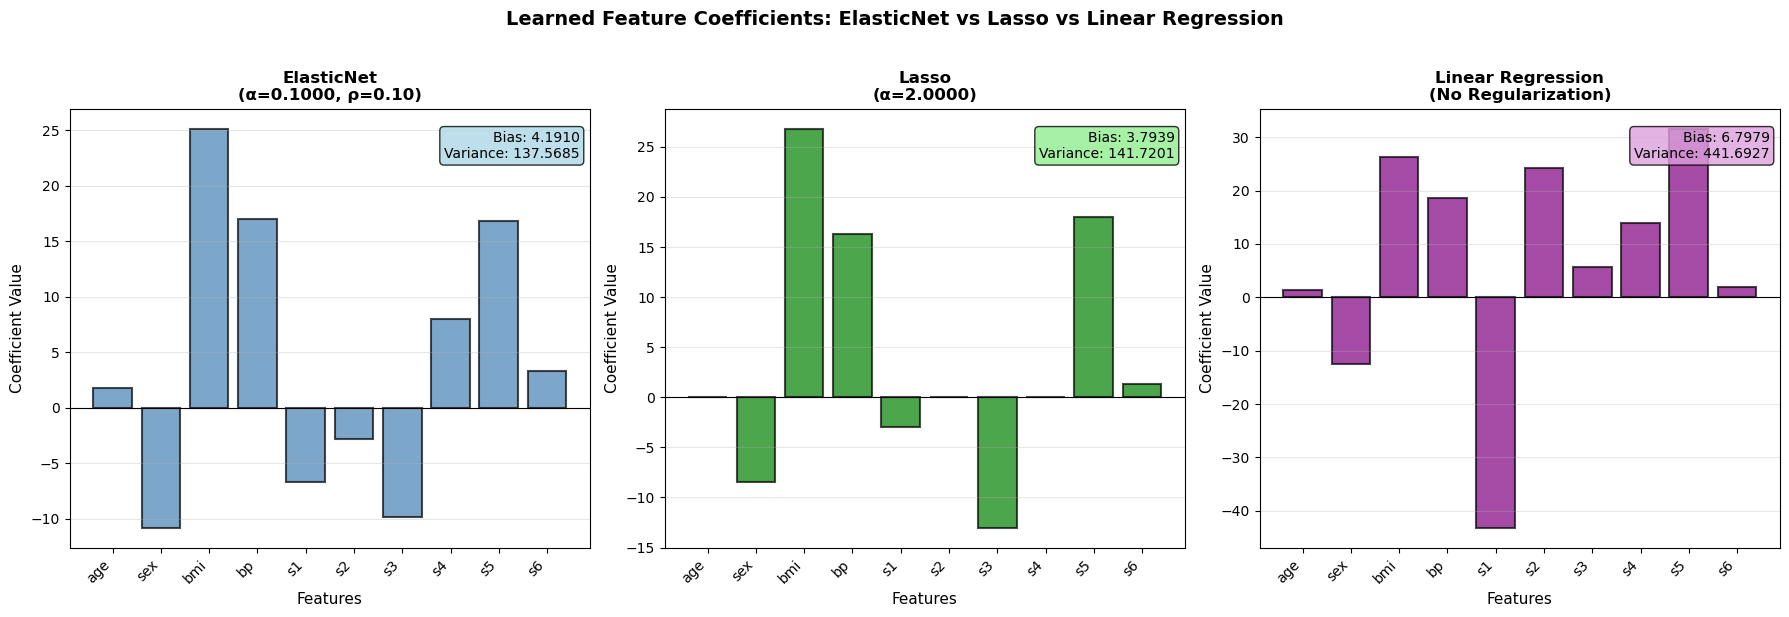


Key Observations:
- ElasticNet (blue) shows L1+L2 regularization effects
- Lasso (green) shows L1 feature selection (2 features dropped)
- Linear Regression (purple) uses all features without regularization
- Bias = mean coefficient value; Variance = spread of coefficients
- Lower variance indicates more regularization/feature elimination


In [26]:
print("\n" + "="*70)
print("EXAMINING LEARNED FEATURE COEFFICIENTS")
print("="*70)

# Get feature names (all columns except 'target')
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")
feature_names = [col for col in df.columns if col != 'target']

# Display coefficients for all three models
print("\n1. ELASTICNET COEFFICIENTS")
print("-" * 70)
print(f"Alpha: {en_alpha_final:.4f}, Rho: {en_rho_final:.2f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_en_model.weights[i]:>10.6f}")
print(f"\nBias: {final_en_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_en_model.weights) > 1e-2)}/10")

# List eliminated features for ElasticNet
en_zero_idx = np.where(np.abs(final_en_model.weights) < 1e-2)[0]
if len(en_zero_idx) == 0:
    print("ElasticNet eliminated features: none")
else:
    en_zero_features = [feature_names[i] for i in en_zero_idx]
    print(f"ElasticNet eliminated features: {en_zero_features}")

print("\n" + "="*70)
print("2. LASSO COEFFICIENTS")
print("-" * 70)
print(f"Alpha: {lasso_alpha_final:.4f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_lasso_model.weights[i]:>10.6f}")
print(f"\nBias: {final_lasso_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_lasso_model.weights) > 1e-2)}/10")

# List eliminated features for Lasso
lasso_zero_idx = np.where(np.abs(final_lasso_model.weights) < 1e-2)[0]
if len(lasso_zero_idx) == 0:
    print("Lasso eliminated features: none")
else:
    lasso_zero_features = [feature_names[i] for i in lasso_zero_idx]
    print(f"Lasso eliminated features: {lasso_zero_features}")

print("\n" + "="*70)
print("3. LINEAR REGRESSION COEFFICIENTS")
print("-" * 70)
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {lr_sklearn.coef_[i]:>10.6f}")
print(f"\nIntercept: {lr_sklearn.intercept_:.6f}")
print(f"Non-zero coefficients: 10/10 (all features used)")

# Create visualizations
print("\n" + "="*70)
print("COEFFICIENT COMPARISON VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ElasticNet coefficients
ax = axes[0]
ax.bar(range(len(feature_names)), final_en_model.weights, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'ElasticNet\n(α={en_alpha_final:.4f}, ρ={en_rho_final:.2f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_en = np.mean(final_en_model.weights)
var_en = np.var(final_en_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_en:.4f}\nVariance: {var_en:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Lasso coefficients
ax = axes[1]
ax.bar(range(len(feature_names)), final_lasso_model.weights, color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'Lasso\n(α={lasso_alpha_final:.4f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lasso = np.mean(final_lasso_model.weights)
var_lasso = np.var(final_lasso_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_lasso:.4f}\nVariance: {var_lasso:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Linear Regression coefficients
ax = axes[2]
ax.bar(range(len(feature_names)), lr_sklearn.coef_, color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title('Linear Regression\n(No Regularization)', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lr = np.mean(lr_sklearn.coef_)
var_lr = np.var(lr_sklearn.coef_)
ax.text(0.98, 0.95, f'Bias: {bias_lr:.4f}\nVariance: {var_lr:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))

plt.suptitle('Learned Feature Coefficients: ElasticNet vs Lasso vs Linear Regression', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"- ElasticNet (blue) shows L1+L2 regularization effects")
print(f"- Lasso (green) shows L1 feature selection (2 features dropped)")
print(f"- Linear Regression (purple) uses all features without regularization")
print(f"- Bias = mean coefficient value; Variance = spread of coefficients")
print(f"- Lower variance indicates more regularization/feature elimination")

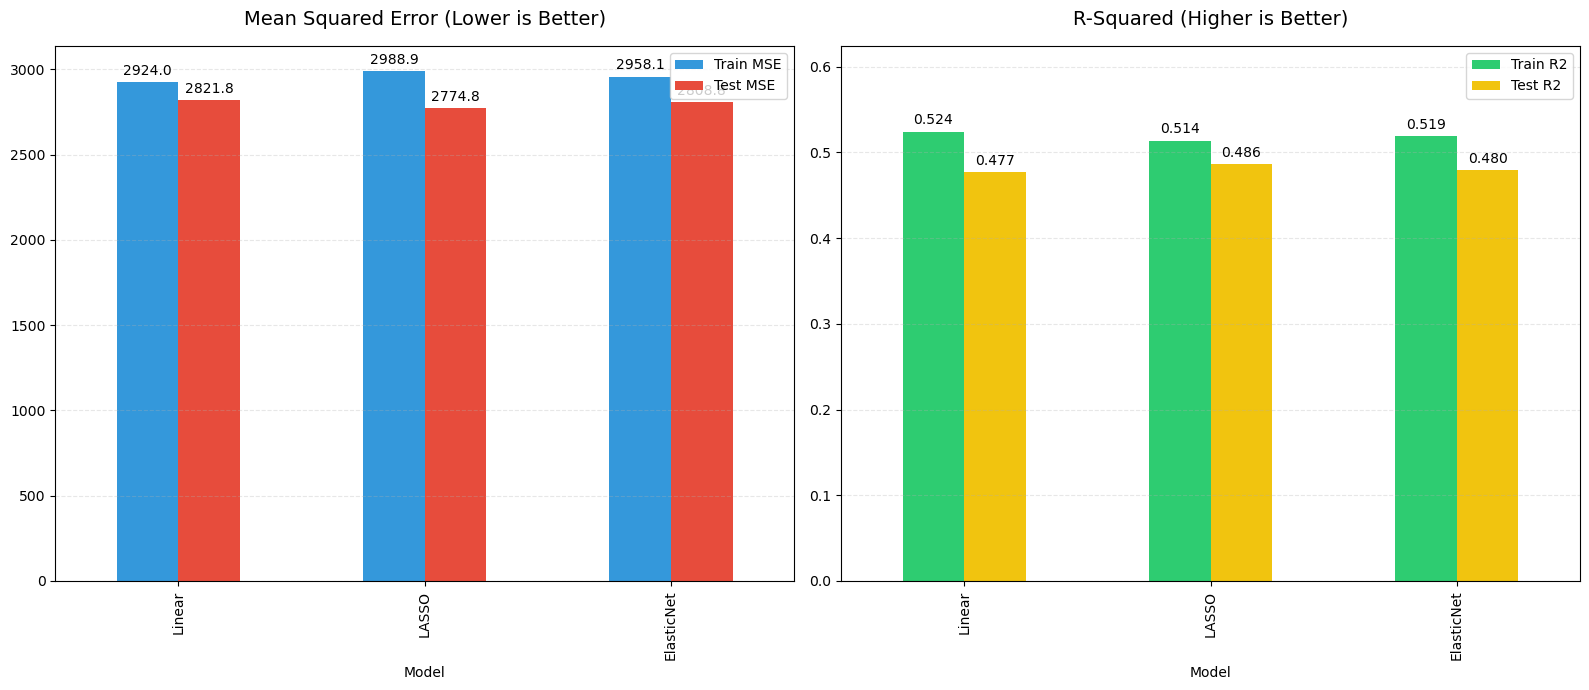


FINAL PERFORMANCE SUMMARY
     Model   Train MSE    Test MSE  Train R2  Test R2
    Linear 2924.046379 2821.750981  0.524412 0.477290
     LASSO 2988.917570 2774.753689  0.513861 0.485996
ElasticNet 2958.107473 2808.819404  0.518872 0.479685
----------------------------------------------------------------------
: The LASSO model performed best on the Test Set (R2 = 0.4860).


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Helper Function to collect metrics
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    mse = calculate_mse(y, y_pred)
    r2 = calculate_r2(y, y_pred)
    return mse, r2

# 2. Collect results for all models
models = {
    'Linear': lr_sklearn,
    'LASSO': lasso_final,
    'ElasticNet': final_en
}

results = []
for name, model in models.items():
    train_mse, train_r2 = get_metrics(model, X_train, y_train)
    test_mse, test_r2 = get_metrics(model, X_test, y_test)
    
    results.append({
        'Model': name,
        'Train MSE': train_mse, 'Test MSE': test_mse,
        'Train R2': train_r2, 'Test R2': test_r2
    })

df_results = pd.DataFrame(results)

# 3. Identify the best model based on Test R2
best_model_name = df_results.loc[df_results['Test R2'].idxmax(), 'Model']
best_model_r2 = df_results['Test R2'].max()

# 4. Plotting the Bar Charts
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: MSE Comparison
mse_plot = df_results.plot(x='Model', y=['Train MSE', 'Test MSE'], kind='bar', ax=ax[0], color=['#3498db', '#e74c3c'])
ax[0].set_title('Mean Squared Error (Lower is Better)', fontsize=14, pad=15)
ax[0].grid(axis='y', linestyle='--', alpha=0.3)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f', padding=3)

# Plot 2: R2 Comparison
r2_plot = df_results.plot(x='Model', y=['Train R2', 'Test R2'], kind='bar', ax=ax[1], color=['#2ecc71', '#f1c40f'])
ax[1].set_title('R-Squared (Higher is Better)', fontsize=14, pad=15)
ax[1].set_ylim(0, df_results[['Train R2', 'Test R2']].max().max() + 0.1)
ax[1].grid(axis='y', linestyle='--', alpha=0.3)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

# 5. Print Summary Table and Identification
print("\n" + "="*70)
print("FINAL PERFORMANCE SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("-" * 70)
print(f": The {best_model_name} model performed best on the Test Set (R2 = {best_model_r2:.4f}).")
print("="*70)

In [23]:
# Checking the relative importance of features based on their weights
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

print("="*70)
print("LASSO WEIGHT ANALYSIS")
print("="*70)
max_w_lasso = np.max(np.abs(lasso_final.weights))
print(f"\nMax Weight: {max_w_lasso:.4f}")
print(f"5% Cutoff Value: {0.05 * max_w_lasso:.4f}")
print("-" * 70)
for name, w in zip(feature_names, lasso_final.weights):
    ratio = abs(w) / max_w_lasso if max_w_lasso > 0 else 0
    print(f"{name:<10} | Weight: {abs(w):>8.4f} | % of Max: {ratio*100:>6.2f}%")

print("\n" + "="*70)
print("ELASTICNET WEIGHT ANALYSIS")
print("="*70)
max_w_en = np.max(np.abs(final_en.weights))
print(f"\nMax Weight: {max_w_en:.4f}")
print(f"5% Cutoff Value: {0.05 * max_w_en:.4f}")
print("-" * 70)
for name, w in zip(feature_names, final_en.weights):
    ratio = abs(w) / max_w_en if max_w_en > 0 else 0
    print(f"{name:<10} | Weight: {abs(w):>8.4f} | % of Max: {ratio*100:>6.2f}%")


LASSO WEIGHT ANALYSIS

Max Weight: 26.8134
5% Cutoff Value: 1.3407
----------------------------------------------------------------------
age        | Weight:   0.0000 | % of Max:   0.00%
sex        | Weight:   8.4088 | % of Max:  31.36%
bmi        | Weight:  26.8134 | % of Max: 100.00%
bp         | Weight:  16.3495 | % of Max:  60.98%
s1         | Weight:   2.9863 | % of Max:  11.14%
s2         | Weight:   0.0000 | % of Max:   0.00%
s3         | Weight:  13.0763 | % of Max:  48.77%
s4         | Weight:   0.0000 | % of Max:   0.00%
s5         | Weight:  17.9612 | % of Max:  66.99%
s6         | Weight:   1.2860 | % of Max:   4.80%

ELASTICNET WEIGHT ANALYSIS

Max Weight: 25.1483
5% Cutoff Value: 1.2574
----------------------------------------------------------------------
age        | Weight:   1.7812 | % of Max:   7.08%
sex        | Weight:  10.8669 | % of Max:  43.21%
bmi        | Weight:  25.1483 | % of Max: 100.00%
bp         | Weight:  16.9958 | % of Max:  67.58%
s1         | Weigh